In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/500yr/23030101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/500yr/23030101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/500yr/23030101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/500yr/23000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)


# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]



/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
    vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
    vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    sfn_basin_resmean = (vmo_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_res = (vhGM_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean


def find_max_overturning(sfn_basin_resmean, dataset):
#     max_value = sfn_basin_resmean[:,0:49].max()
#     max_index = np.where(sfn_basin_resmean[:,0:49] == max_value)
    
    max_value = sfn_basin_resmean.sel(yq=slice(-35,60)).max()
    max_index = np.where(sfn_basin_resmean.sel(yq=slice(-35,60)) == max_value)
    
    max_depth = dataset.z_l.isel(z_l=max_index[0][0])
    max_lat = dataset.yq.isel(yq=max_index[1][0])

    return(max_value, max_depth, max_lat)


def calc_sigma2(dy_case, salt, temp):
    CT = xr.apply_ufunc(gsw.CT_from_pt, salt, temp, dask='parallelized', output_dtypes=[float,])

    sigma2 = xr.apply_ufunc(gsw.sigma2, salt, CT, dask='parallelized', output_dtypes=[float,])
    
    sigma2_xarray = temp.copy()
    sigma2_xarray.attrs['units'] = 'kg/m^3' 
    sigma2_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma2_xarray.attrs['standard_name'] = 'sigma2'
    sigma2_xarray.values = sigma2
    
    return sigma2_xarray


### First, calculate AMOC, find max overturning strength, and find max overturning depth

In [3]:
sfn_small_resmean_straight = calculate_basin_sfn(dz_straight.vmo, dz_straight.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_straight, max_depth_straight, max_lat_straight = find_max_overturning(sfn_small_resmean_straight, dz_straight)

print(case_straight)
print(max_ov_straight.values, 'Sv')
print(max_depth_straight.values, 'm')

Straight Coast
38.68298 Sv
1200.0 m


In [4]:
sfn_small_resmean_both = calculate_basin_sfn(dz_both.vmo, dz_both.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_both, max_depth_both, max_lat_both = find_max_overturning(sfn_small_resmean_both, dz_both)

print(case_both)
print(max_ov_both.values, 'Sv')
print(max_depth_both.values, 'm')

Both Coast
42.886013 Sv
1300.0 m


In [5]:
sfn_small_resmean_wide = calculate_basin_sfn(dz_wide.vmo, dz_wide.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_wide, max_depth_wide, max_lat_wide = find_max_overturning(sfn_small_resmean_wide, dz_wide)

print(case_wide)
print(max_ov_wide.values, 'Sv')
print(max_depth_wide.values, 'm')

Wide Straight
46.41468 Sv
1750.0 m


In [6]:
sfn_small_resmean_am = calculate_basin_sfn(dz_am.vmo, dz_am.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_am, max_depth_am, max_lat_am = find_max_overturning(sfn_small_resmean_am, dz_am)

print(case_am)
print(max_ov_am.values, 'Sv')
print(max_depth_am.values, 'm')

America Coast
40.716656 Sv
1200.0 m


In [7]:
sfn_small_resmean_af = calculate_basin_sfn(dz_af.vmo, dz_af.vhGM, x_west, x_east, y, y_north)

# sfn_basin_resmean.plot()
# plt.gca().invert_yaxis()

max_ov_af, max_depth_af, max_lat_af = find_max_overturning(sfn_small_resmean_af, dz_af)

print(case_af)
print(max_ov_af.values, 'Sv')
print(max_depth_af.values, 'm')

Africa Coast
35.804844 Sv
1300.0 m


### Now calculate  $\Delta \rho$ for each case

In [8]:
rho_north_straight = calc_sigma2(dz_straight, 
                                   dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_straight = calc_sigma2(dz_straight, 
                                   dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_straight_tmp = rho_north_straight.copy()
delta_rho_straight_tmp.values = rho_north_straight.values-rho_south_straight.values
delta_rho_straight = delta_rho_straight_tmp.mean(dim='yh').mean(dim='xh')


In [9]:
rho_north_both = calc_sigma2(dz_both, 
                                   dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_both = calc_sigma2(dz_both, 
                                   dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_both_tmp = rho_north_both.copy()
delta_rho_both_tmp.values = rho_north_both.values-rho_south_both.values
delta_rho_both = delta_rho_both_tmp.mean(dim='yh').mean(dim='xh')

In [10]:
rho_north_wide = calc_sigma2(dz_wide, 
                                   dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_wide = calc_sigma2(dz_wide, 
                                   dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_wide_tmp = rho_north_wide.copy()
delta_rho_wide_tmp.values = rho_north_wide.values-rho_south_wide.values
delta_rho_wide = delta_rho_wide_tmp.mean(dim='yh').mean(dim='xh')

In [11]:
rho_north_am = calc_sigma2(dz_am, 
                                   dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_am = calc_sigma2(dz_am, 
                                   dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_am_tmp = rho_north_am.copy()
delta_rho_am_tmp.values = rho_north_am.values-rho_south_am.values
delta_rho_am = delta_rho_am_tmp.mean(dim='yh').mean(dim='xh')

In [12]:
rho_north_af = calc_sigma2(dz_af, 
                                   dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_af = calc_sigma2(dz_af, 
                                   dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_af_tmp = rho_north_af.copy()
delta_rho_af_tmp.values = rho_north_af.values-rho_south_af.values
delta_rho_af = delta_rho_af_tmp.mean(dim='yh').mean(dim='xh')

### Predicted AMOC strength from Butler et al 2016

In [13]:
## flip the delta rho arrays to integrate from depth to surface instead of the other way around

delta_rho_straight = delta_rho_straight[::-1]
delta_rho_both = delta_rho_both[::-1]
delta_rho_wide = delta_rho_wide[::-1]
delta_rho_am = delta_rho_am[::-1]
delta_rho_af = delta_rho_af[::-1]

In [26]:
# Set constants for the calculation here

# Lx = average zonal width of basin. 
# Come back and do this more rigorously!
Lx_straight = 8991000 # m
Lx_both = 11433000    # m
Lx_am = 10545000      # m
Lx_af = 9879000       # m
Lx_wide = 11433000    # m

dz = xr.zeros_like(dy_straight.zl) + 2.5
dz[1:31] = dy_straight.zl.diff('zl').values

c_rho = 0.96
g = 9.81
rho_0 = 1035
f_0 = 1e-4
# Ly = (60)*111000 # uncomment if doing density diff from north to eq
Ly = (60+31)*111000 # uncomment if doing density diff from north to southern extent of Africa

constant = c_rho*g/(rho_0*f_0*Ly)

h = delta_rho_straight.zl.isel(zl=0)

# latitude bounds for model output maximum overturning for comparison with predicted overturning
lat_s = -32
lat_n = 60

In [15]:
# Straight Coast calculation

term1_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_straight = constant * (term1 - term2)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_straight_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (Vz_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_straight_tmp[i] = integ.values

Psi_straight = (Psi_straight_tmp*Lx_straight)/(1e6)

print(Psi_straight.max())

max_index = np.where(Psi_straight == Psi_straight.max())
    
Psi_max_depth_straight = Psi_straight.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_straight)


<xarray.DataArray 'thetao' ()>
array(37.19300888)
<xarray.DataArray 'zl' ()>
array(1200.)
Coordinates:
    zl       float64 1.2e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


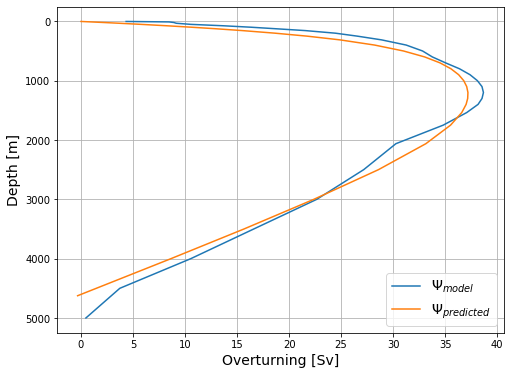

<xarray.DataArray 'vmo' ()>
array(38.68298, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1200.)
Coordinates:
    z_l      float64 1.2e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [27]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_straight = []

sfn_straight = sfn_small_resmean_straight.sel(yq=slice(lat_s,lat_n))

psi_max_straight = np.amax(sfn_straight, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_straight, sfn_small_resmean_straight.z_l, label='$\Psi_{model}$')
ax.plot(Psi_straight, Psi_straight.zl, label='$\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

print(psi_max_straight.max(), 'Sv')
print(max_depth_straight)

In [17]:
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_both = constant * (term1 - term2)


# Psi_p = Lx * integral from z to 0 of Vz 
Psi_both_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (Vz_both*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_both_tmp[i] = integ.values

Psi_both = (Psi_both_tmp*Lx_both)/(1e6)

print(Psi_both.max())

max_index = np.where(Psi_both == Psi_both.max())
    
Psi_max_depth_both = Psi_both.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_both)


<xarray.DataArray 'thetao' ()>
array(53.80001556)
<xarray.DataArray 'zl' ()>
array(1300.)
Coordinates:
    zl       float64 1.3e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


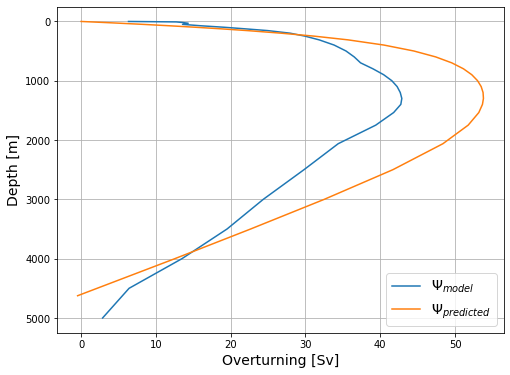

<xarray.DataArray 'vmo' ()>
array(42.886013, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1300.)
Coordinates:
    z_l      float64 1.3e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [28]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_both = []

sfn_both = sfn_small_resmean_both.sel(yq=slice(lat_s,lat_n))

psi_max_both = np.amax(sfn_both, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_both, sfn_small_resmean_both.z_l, label='$\Psi_{model}$')
ax.plot(Psi_both, Psi_both.zl, label='$\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

print(psi_max_both.max(), 'Sv')
print(max_depth_both)

In [19]:
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (delta_rho_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (delta_rho_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_wide = constant * (term1 - term2)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_wide_tmp = xr.zeros_like(delta_rho_wide)

for i in range(len(delta_rho_wide.zl)):
    integ = (Vz_wide*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_wide_tmp[i] = integ.values

Psi_wide = (Psi_wide_tmp*Lx_wide)/(1e6)

print(Psi_wide.max())

max_index = np.where(Psi_wide == Psi_wide.max())
    
Psi_max_depth_wide = Psi_wide.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_wide)


<xarray.DataArray 'thetao' ()>
array(49.989376)
<xarray.DataArray 'zl' ()>
array(1400.)
Coordinates:
    zl       float64 1.4e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


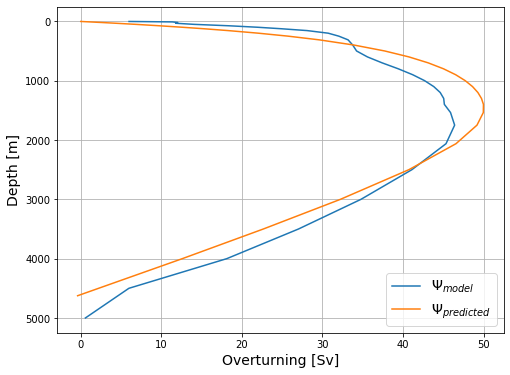

<xarray.DataArray 'vmo' ()>
array(46.41468, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1750.)
Coordinates:
    z_l      float64 1.75e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [20]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_wide = []

sfn_wide = sfn_small_resmean_wide.sel(yq=slice(lat_s,lat_n))

psi_max_wide = np.amax(sfn_wide, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_wide, sfn_small_resmean_wide.z_l, label='$\Psi_{model}$')
ax.plot(Psi_wide, Psi_wide.zl, label='$\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

print(psi_max_wide.max(), 'Sv')
print(max_depth_wide)

In [21]:
term1_tmp = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (delta_rho_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (delta_rho_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_am = constant * (term1 - term2)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_am_tmp = xr.zeros_like(delta_rho_am)

for i in range(len(delta_rho_am.zl)):
    integ = (Vz_am*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_am_tmp[i] = integ.values

Psi_am = (Psi_am_tmp*Lx_am)/(1e6)

print(Psi_am.max())

max_index = np.where(Psi_am == Psi_am.max())
    
Psi_max_depth_am = Psi_am.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_am)


<xarray.DataArray 'thetao' ()>
array(43.49380911)
<xarray.DataArray 'zl' ()>
array(1200.)
Coordinates:
    zl       float64 1.2e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


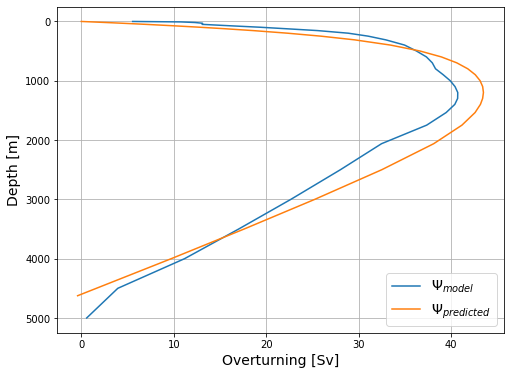

<xarray.DataArray 'vmo' ()>
array(40.716656, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1200.)
Coordinates:
    z_l      float64 1.2e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [22]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_am = []

sfn_am = sfn_small_resmean_am.sel(yq=slice(lat_s,lat_n))

psi_max_am = np.amax(sfn_am, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_am, sfn_small_resmean_am.z_l, label='$\Psi_{model}$')
ax.plot(Psi_am, Psi_am.zl, label='$\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

print(psi_max_am.max(), 'Sv')
print(max_depth_am)

In [23]:
term1_tmp = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (delta_rho_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (delta_rho_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_af = constant * (term1 - term2)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_af_tmp = xr.zeros_like(delta_rho_af)

for i in range(len(delta_rho_af.zl)):
    integ = (Vz_af*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_af_tmp[i] = integ.values

Psi_af = (Psi_af_tmp*Lx_af)/(1e6)

print(Psi_af.max())

max_index = np.where(Psi_af == Psi_af.max())
    
Psi_max_depth_af = Psi_af.zl.isel(zl=max_index[0][0])
print(Psi_max_depth_af)


<xarray.DataArray 'thetao' ()>
array(44.63883803)
<xarray.DataArray 'zl' ()>
array(1300.)
Coordinates:
    zl       float64 1.3e+03
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down


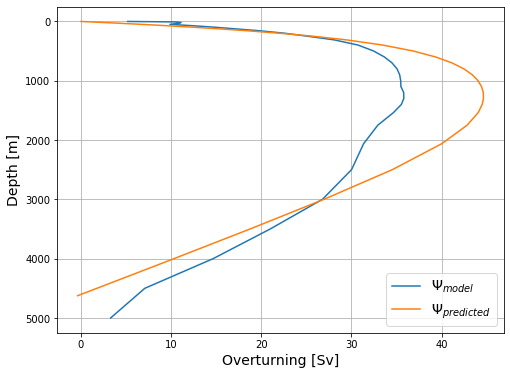

<xarray.DataArray 'vmo' ()>
array(35.804844, dtype=float32) Sv
<xarray.DataArray 'z_l' ()>
array(1300.)
Coordinates:
    z_l      float64 1.3e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [24]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_af = []

sfn_af = sfn_small_resmean_af.sel(yq=slice(lat_s,lat_n))

psi_max_af = np.amax(sfn_af, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(psi_max_af, sfn_small_resmean_af.z_l, label='$\Psi_{model}$')
ax.plot(Psi_af, Psi_af.zl, label='$\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

print(psi_max_af.max(), 'Sv')
print(max_depth_af)

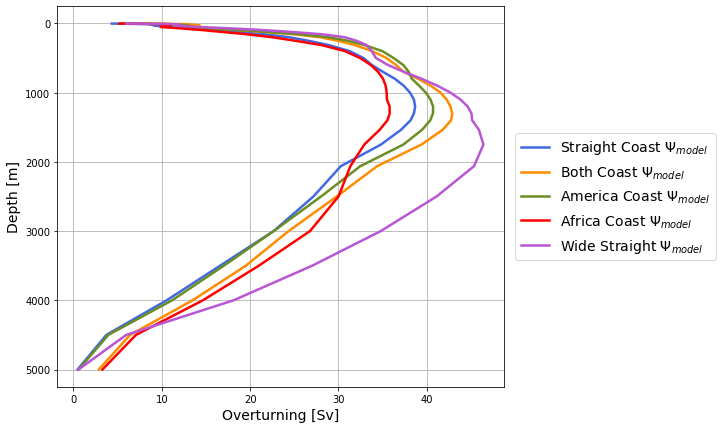

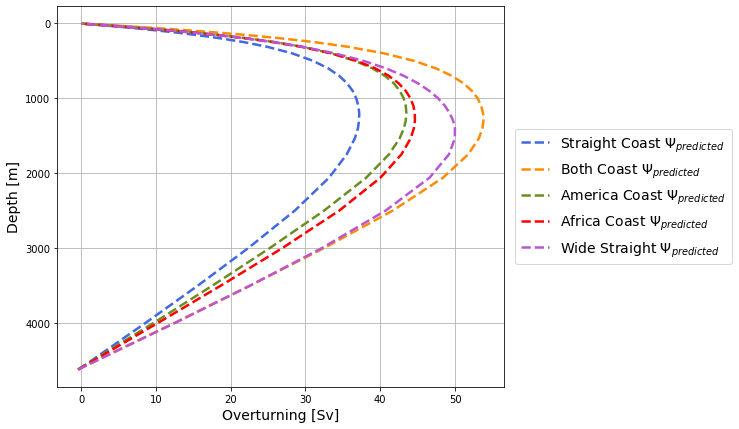

In [60]:
width = 2.5

fig, ax = plt.subplots(figsize=(8,7))
ax.plot(psi_max_straight, psi_max_straight.z_l, 
        color='royalblue', linewidth=width, label='Straight Coast $\Psi_{model}$')
# ax.plot(Psi_straight, Psi_straight.zl, 
#         color='royalblue', linestyle='dashed', linewidth=width, label='Straight Coast $\Psi_{predicted}$')
ax.plot(psi_max_both, psi_max_both.z_l, 
        color='darkorange', linewidth=width, label='Both Coast $\Psi_{model}$')
# ax.plot(Psi_both, Psi_both.zl, 
#         color='darkorange', linestyle='dashed', linewidth=width, label='Both Coast $\Psi_{predicted}$')
ax.plot(psi_max_am, psi_max_am.z_l, 
        color='olivedrab', linewidth=width, label='America Coast $\Psi_{model}$')
# ax.plot(Psi_am, Psi_am.zl, 
#         color='olivedrab', linestyle='dashed', linewidth=width, label='America Coast $\Psi_{predicted}$')
ax.plot(psi_max_af, psi_max_af.z_l, 
        color='r', linewidth=width, label='Africa Coast $\Psi_{model}$')
# ax.plot(Psi_af, Psi_af.zl, 
#         color='r', linestyle='dashed', linewidth=width, label='Africa Coast $\Psi_{predicted}$')
ax.plot(psi_max_wide, psi_max_wide.z_l, 
        color='mediumorchid', linewidth=width, label='Wide Straight $\Psi_{model}$')
# ax.plot(Psi_wide, Psi_wide.zl, 
#         color='mediumorchid', linestyle='dashed', linewidth=width, label='Wide Straight $\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8,7))
# ax.plot(psi_max_straight, psi_max_straight.z_l, 
#         color='royalblue', linewidth=width, label='Straight Coast $\Psi_{model}$')
ax.plot(Psi_straight, Psi_straight.zl, 
        color='royalblue', linestyle='dashed', linewidth=width, label='Straight Coast $\Psi_{predicted}$')
# ax.plot(psi_max_both, psi_max_both.z_l, 
#         color='darkorange', linewidth=width, label='Both Coast $\Psi_{model}$')
ax.plot(Psi_both, Psi_both.zl, 
        color='darkorange', linestyle='dashed', linewidth=width, label='Both Coast $\Psi_{predicted}$')
# ax.plot(psi_max_am, psi_max_am.z_l, 
#         color='olivedrab', linewidth=width, label='America Coast $\Psi_{model}$')
ax.plot(Psi_am, Psi_am.zl, 
        color='olivedrab', linestyle='dashed', linewidth=width, label='America Coast $\Psi_{predicted}$')
# ax.plot(psi_max_af, psi_max_af.z_l, 
#         color='r', linewidth=width, label='Africa Coast $\Psi_{model}$')
ax.plot(Psi_af, Psi_af.zl, 
        color='r', linestyle='dashed', linewidth=width, label='Africa Coast $\Psi_{predicted}$')
# ax.plot(psi_max_wide, psi_max_wide.z_l, 
#         color='mediumorchid', linewidth=width, label='Wide Straight $\Psi_{model}$')
ax.plot(Psi_wide, Psi_wide.zl, 
        color='mediumorchid', linestyle='dashed', linewidth=width, label='Wide Straight $\Psi_{predicted}$')
plt.gca().invert_yaxis(), plt.grid()
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()